In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv(r'C:\Users\juesg\Desktop\DATA SCIENCE\Modulo No. 6\Proyecto Integrador\Propuesta 1\mlfile.csv', sep=',')
df

,Unnamed: 0,EDAD,PSA_STD,NUMERO DE MUESTRAS TOMADAS STD,DIABETES_L,HOSPITALIZACIÓN_ULTIMO_MES_L,BIOPSIAS_PREVIAS_L,VOLUMEN_PROSTATICO_L,ANTIBIOTICO_L,CUP_L,ENFERMEDAD_PULMONAR_L,BIOPSIA_L,FIEBRE_L,ITU_L,TIPO_DE_CULTIVO_L,AGENTE_AISLADO_L,PATRON_DE_RESISTENCIA_L,HOSPITALIZACION_L
0,0,53,-0.594326,-0.254351,0,0,0,1,1,0,0,9,1,0,2,1,2,1
1,1,56,-0.357145,-0.254351,0,0,0,1,1,0,0,9,1,0,2,1,2,1
2,2,57,1.008253,2.808650,0,0,1,1,1,0,0,9,1,0,0,0,0,1
3,3,56,-0.402017,-0.254351,0,0,0,1,1,0,0,9,1,0,2,1,2,1
4,4,55,1.008253,2.808650,0,0,1,1,1,0,0,9,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,563,67,-0.466120,-0.254351,0,0,0,1,1,0,0,1,0,0,2,1,2,0
564,564,64,-0.543044,-0.254351,0,0,0,1,4,0,0,4,0,0,2,1,2,0
565,565,69,-0.566762,1.787649,0,0,0,1,1,0,0,9,0,0,2,1,2,0
566,566,67,-0.337914,-0.254351,0,0,0,1,1,0,0,4,0,0,2,1,2,0


Definición variables dependientes e independientes

In [119]:
x = df[['FIEBRE_L','ITU_L', 'AGENTE_AISLADO_L', 'PSA_STD','EDAD']]
y = df['HOSPITALIZACION_L']

Set de entrenamiento y test

In [120]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

Entrenamiento de modelo predicción

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

In [122]:
ypred = dtc.predict(xtest)

Matriz de confusión

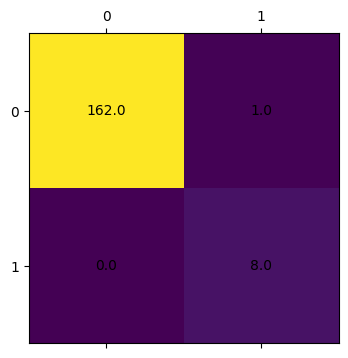

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(ypred, ytest)

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

Evaluación

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print('Accuracy score =', accuracy_score(ytest, ypred)) 
print('F1 score = ', f1_score(ypred, ytest)) 




Accuracy score = 0.9941520467836257
F1 score =  0.9411764705882353


In [125]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(ytest, ypred, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(ytest)
    ytest = lb.transform(ytest)
    ypred = lb.transform(ypred)
    return roc_auc_score(ytest, ypred, average=average)

print('Curva ROC score = ',multiclass_roc_auc_score(ytest, ypred))

Curva ROC score =  0.9444444444444444


La curva ROC indica la capacidad del modelo de clasificar de forma adecuada con nuestras variables si la persona sera hospitalizada o no. En este caso el modelo nos indica que tendria un grado de aciert de 0.94 veces.

Optimización

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'criterion': ['gini', 'entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
              }


model = GridSearchCV(dtc, param_grid=param_grid, cv=10)
model.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14,
                                       16, 18, 20]})

In [127]:
print(model.best_estimator_.get_params()['criterion'])
print(model.best_estimator_.get_params()['max_depth'])

gini
2


In [128]:
dtc2 = DecisionTreeClassifier(max_depth=2, criterion='gini')
dtc2.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

In [129]:
ypred2 = dtc2.predict(xtest)

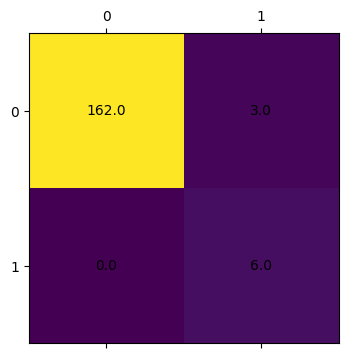

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(ypred2, ytest)

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print('Accuracy score =', accuracy_score(ytest, ypred2)) 
print('F1 score = ', f1_score(ypred2, ytest)) 

Accuracy score = 0.9824561403508771
F1 score =  0.8


In [132]:
print('Curva ROC score = ',multiclass_roc_auc_score(ytest, ypred2))

Curva ROC score =  0.8333333333333333


A pesar de que las métricas nos indican un resultado menor con los parámetros escogidos, esto se presenta pues en el modelo arbitrario el modelo estaba sobrestimando lo que implicaría bajo desempeño antes nuevos datos. aquí estamos asegurando un desempeño optimo ante nueva información que es lo que realmente buscamos.

Modelo comparativo K Vecinos cercanos

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn.fit(xtrain, ytrain)
ypred3 = knn.predict(xtest)



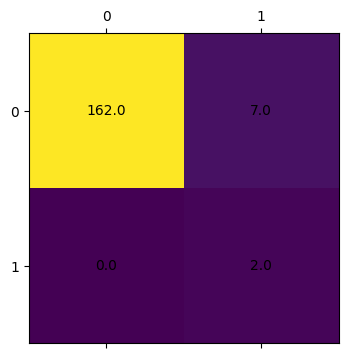

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(ypred3, ytest)

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print('Accuracy score =', accuracy_score(ytest, ypred3)) 
print('F1 score = ', f1_score(ypred3, ytest))
print('Curva ROC score = ',multiclass_roc_auc_score(ytest, ypred3))

Accuracy score = 0.9590643274853801
F1 score =  0.3636363636363636
Curva ROC score =  0.6111111111111112


Optimización

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'algorithm': ['auto', 'ball_tree','Kd_tree','brute'],
              'n_neighbors':[1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
              }


model = GridSearchCV(knn, param_grid=param_grid, cv=10)
model.fit(xtrain, ytrain)

In [140]:
print(model.best_estimator_.get_params()['algorithm'])
print(model.best_estimator_.get_params()['n_neighbors'])

auto
1


In [141]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
knn.fit(xtrain, ytrain)
ypred4 = knn.predict(xtest)

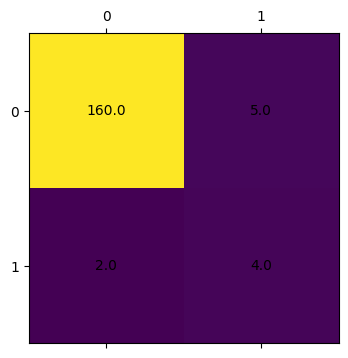

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(ypred4, ytest)

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print('Accuracy score =', accuracy_score(ytest, ypred4)) 
print('F1 score = ', f1_score(ypred4, ytest))
print('Curva ROC score = ',multiclass_roc_auc_score(ytest, ypred4))

Accuracy score = 0.9590643274853801
F1 score =  0.5333333333333333
Curva ROC score =  0.7160493827160493


In [ ]:
Habiendo evaluado los modelos del árbol de decisión y vecinos más cercanos y optimizándolos podemos concluir que el modelo de mejor desempeño fue el árbol de aprendizaje, a continuación un breve resumen de las métricas de evaluación:

árbol de decisión optimizado:

Accuracy = 0.9824
F1 score = 0.8
Curva ROC = 0.8333

Vecinos mas cercanos optimizado:

Accuracy = 0.9590
F1 score = 0.5333
Curva ROC = 0.7160

Como podemos observar el % de errores totales (Accuracy), precision y exhaustividad (F1) y capacidad de realizar una correcta clasificación (Curva ROC) son mayores para el árbol de decisión. Al ser este un modelo que busca entrenar y predecir de forma acertada
la posibilidad de que un pacientes sometido a biopsia de próstata tenga complicaciones y sea hospitalizado o no, debemos seleccionar aquel que tenga la mayor precisión a la hora de realizar la clasificación con los síntomas indicados fiebre, infección o ITU acompañados de la incidencia de la edad y el nivel de antígeno prostático.
